In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.shape

(7043, 21)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# 1st drop the not useful column.
df = df.drop(columns=['customerID'])


In [9]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
# Check missing Value
df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# here we check the totalcharges and tenure to find the actual null or buisness null.

In [12]:
df[(df['TotalCharges'] == 0) & (df['tenure'] > 0)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [13]:
# Now change the catagorical column to numerical by encoding.

In [14]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

gender: 2 unique values
SeniorCitizen: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
tenure: 73 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
MonthlyCharges: 1585 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


In [15]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in df.columns:
  if col not in num_cols:
    print(f'{col}',df[col].value_counts().to_dict())

gender {'Male': 3555, 'Female': 3488}
SeniorCitizen {0: 5901, 1: 1142}
Partner {'No': 3641, 'Yes': 3402}
Dependents {'No': 4933, 'Yes': 2110}
PhoneService {'Yes': 6361, 'No': 682}
MultipleLines {'No': 3390, 'Yes': 2971, 'No phone service': 682}
InternetService {'Fiber optic': 3096, 'DSL': 2421, 'No': 1526}
OnlineSecurity {'No': 3498, 'Yes': 2019, 'No internet service': 1526}
OnlineBackup {'No': 3088, 'Yes': 2429, 'No internet service': 1526}
DeviceProtection {'No': 3095, 'Yes': 2422, 'No internet service': 1526}
TechSupport {'No': 3473, 'Yes': 2044, 'No internet service': 1526}
StreamingTV {'No': 2810, 'Yes': 2707, 'No internet service': 1526}
StreamingMovies {'No': 2785, 'Yes': 2732, 'No internet service': 1526}
Contract {'Month-to-month': 3875, 'Two year': 1695, 'One year': 1473}
PaperlessBilling {'Yes': 4171, 'No': 2872}
PaymentMethod {'Electronic check': 2365, 'Mailed check': 1612, 'Bank transfer (automatic)': 1544, 'Credit card (automatic)': 1522}
Churn {'No': 5174, 'Yes': 1869}


In [16]:
#Categorical (binary: Yes/No or Male/Female):
#gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn (target)

In [17]:
#Categorical (multi-category):
#MultipleLines, InternetService, OnlineSecurity, OnlineBackup,
#DeviceProtection, TechSupport, StreamingTV, StreamingMovies,
#Contract, PaymentMethod

In [18]:
from sklearn.preprocessing import LabelEncoder


In [19]:
# Make a copy to be safe
df_encoded = df.copy()


In [20]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

df_encoded = pd.get_dummies(df_encoded, columns=multi_cat_cols)

In [24]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


In [25]:
# Select only boolean columns and convert them
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [26]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [27]:
df_encoded.shape

(7043, 41)

In [28]:
# now we are going to scale the 3 numeric columns beacuse its value is very high w.r.t. others
# but before that we need to see the distribution for knowing to apply which scaling.

<Axes: xlabel='tenure', ylabel='Count'>

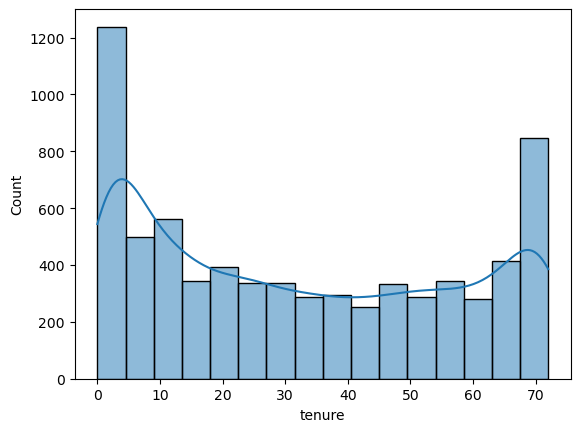

In [29]:
sns.histplot(df_encoded['tenure'],kde=True)

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

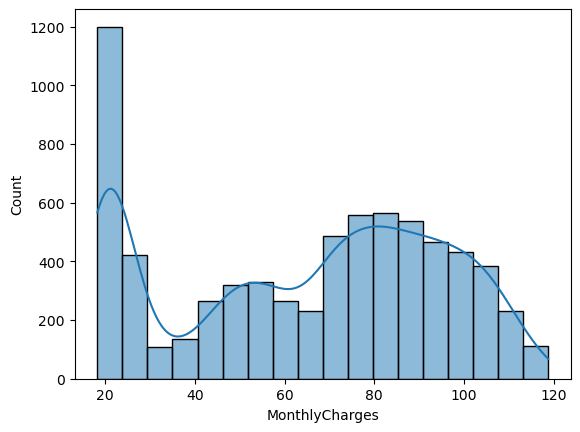

In [30]:
sns.histplot(df_encoded['MonthlyCharges'],kde=True)

<Axes: xlabel='TotalCharges', ylabel='Count'>

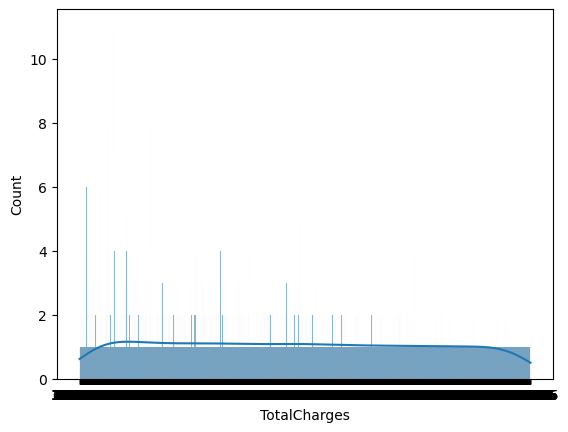

In [31]:
sns.histplot(df_encoded['TotalCharges'],kde=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [33]:
# Step 1: Remove whitespace (like "488 " → "488")
df_encoded['TotalCharges'] = df_encoded['TotalCharges'].astype(str).str.strip()

# Step 2: Replace empty strings with NaN
df_encoded['TotalCharges'].replace('', np.nan, inplace=True)

# Step 3: Convert column to numeric (float64)
df_encoded['TotalCharges'] = pd.to_numeric(df_encoded['TotalCharges'], errors='coerce')


/var/folders/9j/vwmblyhj34zfcjfmsht9bjrm0000gn/T/ipykernel_3162/486284776.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['TotalCharges'].replace('', np.nan, inplace=True)


In [34]:
df_encoded['TotalCharges'].dtype

dtype('float64')

In [35]:
df_encoded['TotalCharges'].isna().sum()

11

In [36]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                         7043 no

In [37]:
df_encoded['TotalCharges'] = df_encoded['TotalCharges'].fillna(0)


In [38]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                         7043 no

<Axes: xlabel='TotalCharges', ylabel='Count'>

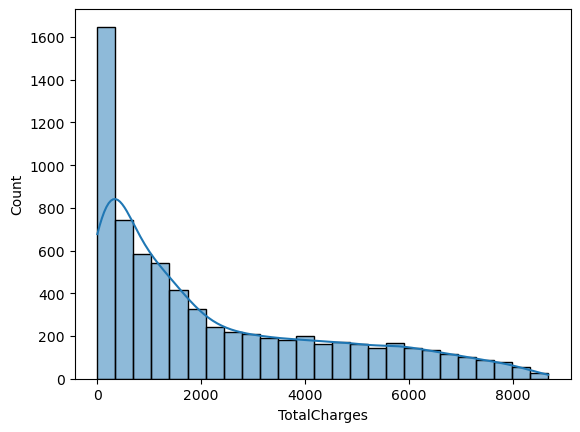

In [39]:
sns.histplot(df_encoded['TotalCharges'],kde=True)

In [40]:
# no we checks the Outliers.

<Axes: ylabel='tenure'>

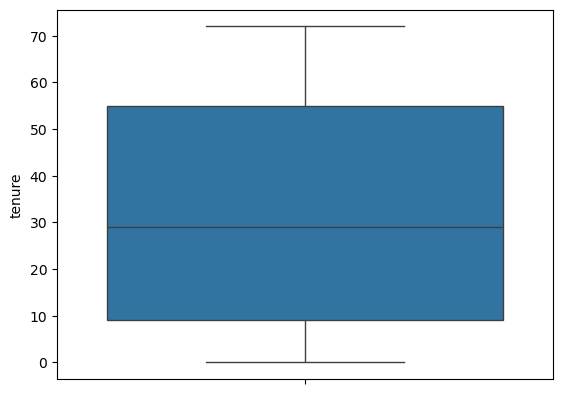

In [41]:
sns.boxplot(df_encoded['tenure'])

<Axes: ylabel='TotalCharges'>

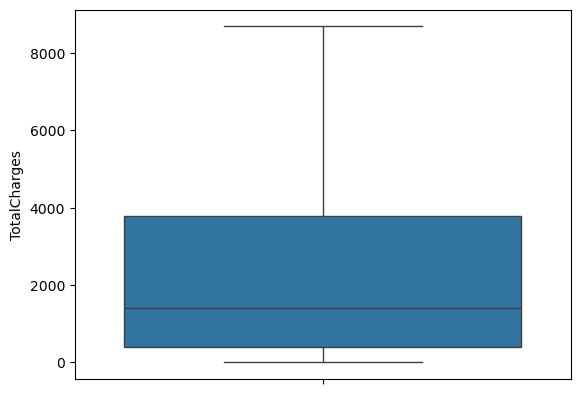

In [42]:
sns.boxplot(df_encoded['TotalCharges'])

<Axes: ylabel='MonthlyCharges'>

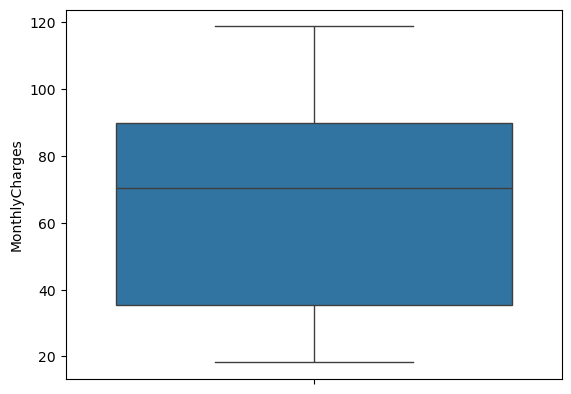

In [43]:
sns.boxplot(df_encoded['MonthlyCharges'])

In [44]:
# So next step is scaling.

In [45]:
from sklearn.preprocessing import MinMaxScaler # we use minmax because in these 3 columns we have skewness.

In [46]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


In [47]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,1,0.115423,0.003437,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,0.385075,0.217564,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.027778,1,1,0.354229,0.012453,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,0.239303,0.211951,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.027778,1,1,0.521891,0.017462,1,...,1,0,0,1,0,0,0,0,1,0


In [48]:
# Now our data is ready for modeling.

In [49]:
from sklearn.model_selection import train_test_split


In [50]:
X = df_encoded.drop('Churn', axis=1)  # features
y = df_encoded['Churn']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,0,0,0,1,0.291667,1,0,0.463682,0.153924,1,...,0,0,1,0,1,0,0,0,0,1
1623,0,0,0,0,0.750000,1,1,0.785572,0.590624,0,...,0,0,1,0,0,1,1,0,0,0
6074,1,0,1,0,0.013889,0,1,0.051741,0.002700,0,...,1,0,0,1,0,0,0,0,1,0
1362,1,0,0,0,0.055556,1,1,0.516915,0.027398,1,...,1,0,0,1,0,0,0,0,1,0
6754,1,0,0,1,0.000000,1,1,0.434328,0.000000,0,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,0.013889,1,1,0.763682,0.010939,1,...,0,0,1,1,0,0,0,0,1,0
5191,0,0,1,1,0.319444,1,1,0.724876,0.253120,0,...,0,0,1,0,0,1,0,1,0,0
5226,1,0,1,1,0.166667,1,1,0.028856,0.035240,1,...,0,1,0,1,0,0,0,0,1,0
5390,1,1,0,0,0.166667,1,1,0.807960,0.138190,0,...,0,0,1,1,0,0,0,0,1,0


In [52]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
185,0,0,1,0,0.013889,0,1,0.065174,0.002856,0,...,1,0,0,1,0,0,0,0,1,0
2715,1,0,0,0,0.569444,1,1,0.069652,0.114735,0,...,0,1,0,1,0,0,1,0,0,0
3825,0,0,1,1,0.722222,1,0,0.010945,0.118794,1,...,0,1,0,0,0,1,0,0,0,1
1807,0,0,0,0,0.013889,1,0,0.578109,0.008791,1,...,1,0,0,1,0,0,0,0,1,0
132,1,0,0,0,0.930556,1,0,0.321393,0.375380,1,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0,0,1,0,0.888889,1,1,0.498010,0.504191,1,...,0,0,1,0,0,1,0,0,0,1
315,1,0,1,1,0.708333,1,0,0.913433,0.654753,0,...,0,0,1,0,1,0,0,1,0,0
2439,1,0,1,1,0.236111,1,0,0.016418,0.037969,1,...,0,1,0,0,1,0,1,0,0,0
5002,0,0,1,1,0.958333,0,1,0.255721,0.340837,0,...,0,0,1,0,0,1,0,1,0,0


In [53]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int64

In [54]:
from sklearn.linear_model import LogisticRegression


In [55]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42) # here i did hypertuning.
log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [56]:
y_pred = log_reg.predict(X_test)


In [57]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [58]:
y_test.value_counts() # here we have imbalane data so we can use SMOTE technique here.

Churn
0    1036
1     373
Name: count, dtype: int64

In [59]:
log_reg.score(X_train, y_train)*100

74.47639332623358

In [60]:
log_reg.score(X_test, y_test)*100

75.0887154009936

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [62]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[749 287]
 [ 64 309]]


In [63]:
recall=recall_score(y_test,y_pred)
recall

0.8284182305630027

In [64]:
precision=precision_score(y_test,y_pred)
precision

0.5184563758389261

In [65]:
f1score=f1_score(y_test,y_pred)
f1score

0.6377708978328174

In [66]:
from sklearn.ensemble import RandomForestClassifier


In [67]:
rf_model = RandomForestClassifier(
    n_estimators=200,   # number of trees
    max_depth=5,    # let trees grow fully
    random_state=42,
    class_weight="balanced"  # handles imbalance a bit
) # hypertuning

In [68]:

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=42)

In [69]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


In [70]:

accuracy_score(y_train, y_train_pred)

0.7445864394746183

In [71]:
accuracy_score(y_test, y_test_pred)

0.7551454932576295

In [72]:
# so for better search now i am going hyperparameter tuning.

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [74]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
} # must in dictionary format


In [75]:
rf = RandomForestClassifier(random_state=42, class_weight="balanced") # base model


In [76]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',  # since churn is imbalanced, f1 is better
    cv=5,
    n_jobs=-1,# cpu cores.
    verbose=2 # controls the level of detail in the output messages printed during the execution.
)

In [77]:
grid_search.fit(X_train, y_train) # it takes 10m to execute thats why its very slow.


Fitting 5 folds for each of 144 candidates, totalling 720 fits


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=2)

In [78]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 Score: 0.6311991197206979


In [79]:
best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1036
           1       0.57      0.78      0.66       373

    accuracy                           0.79      1409
   macro avg       0.74      0.79      0.75      1409
weighted avg       0.82      0.79      0.80      1409



In [81]:
from sklearn.model_selection import RandomizedSearchCV


In [82]:
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 10, 2),
    'max_features': ['sqrt', 'log2']
}

In [83]:
rf = RandomForestClassifier(random_state=42, class_weight="balanced")


In [84]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,  # number of random combos
    scoring='f1',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)


In [85]:
random_search.fit(X_train, y_train) # it takes 3m for executing.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='f1', verbose=2)

In [86]:
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)


Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_depth': None}
Best F1 Score: 0.6338766069314099


In [87]:
best_rf = random_search.best_estimator_
y_test_pred = best_rf.predict(X_test)

In [88]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1036
           1       0.56      0.82      0.66       373

    accuracy                           0.78      1409
   macro avg       0.74      0.79      0.75      1409
weighted avg       0.82      0.78      0.79      1409



In [89]:
## So till our model is not so accurating.

In [90]:
## so now i am trying boosting to my model.

In [91]:
from xgboost import XGBClassifier


In [92]:
neg, pos = y_train.value_counts()
scale = neg / pos

xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale,# handle imbalance
    max_depth=3,        # shallower trees → less complex
    n_estimators=200,   # more but smaller steps
    learning_rate=0.05, # smaller learning steps
    subsample=0.8,      # use 80% samples per tree
    colsample_bytree=0.8 # use 80% features per tree
)



In [93]:
xgb_model.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [94]:
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

In [95]:
accuracy_score(y_train, y_train_pred)

0.7717429889953852

In [96]:
accuracy_score(y_test, y_test_pred)

0.7672107877927609

In [97]:
from imblearn.over_sampling import SMOTE
from collections import Counter


In [98]:
Counter(y_train) # Check class distribution before

Counter({0: 4138, 1: 1496})

In [99]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [100]:
Counter(y_train_res) # # Check class distribution after

Counter({0: 4138, 1: 4138})

In [101]:
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train_res, y_train_res)

y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1036
           1       0.58      0.65      0.62       373

    accuracy                           0.78      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.78      0.79      1409



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:42:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
